# Análisis Exploratorio de Datos y Creación de Cohortes

##### Setup: cargar librerías necesarias

In [3]:
import locale

# Name might vary with operating system.
locale.setlocale(locale.LC_ALL, 'es_ES')

locale._override_localeconv["thousands_sep"] = "."

In [4]:
# Importing the Warnings library for better presentation
import warnings

# Importing the NumPy library for numerical operations (as np)
import numpy as np
# Importing the Pandas library for data manipulation and analysis (as pd)
import pandas as pd

# Importing the Seaborn library for advanced data visualization (as sns)
import seaborn as sns
# Importing the Matplotlib library for basic plotting functionalities (as plt)
import matplotlib.pyplot as plt

from IPython.display import display_html 

#####  Setup: ajustes de visualización para los gráficos

In [5]:
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

warnings.resetwarnings()

In [6]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

## Análisis Exploratorio de Datos (EDA)

### Carga inicial de datos

In [7]:
cash_orig = pd.read_csv('../data/cash_request.csv')

In [8]:
fees_orig = pd.read_csv('../data/fees.csv')

### Visión general de datos

In [9]:
cash_orig.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [10]:
fees_orig.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [11]:
cash_orig.shape # 23970 peticiones de cash

(23970, 16)

In [12]:
fees_orig.shape # 21061 fees

(21061, 13)

In [13]:
# Column names
print(f"Column Names: {cash_orig.columns}")
print(f"Column Names: {fees_orig.columns}")

Column Names: Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')
Column Names: Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')


### Variables de trabajo

In [14]:
fees = fees_orig.copy()
cash = cash_orig.copy()

In [15]:
# Renombrar 'id' a 'cash_request_id' para mayor claridad (y para el merge posterior con fees)
cash.rename(columns={'id': 'cash_request_id'}, inplace=True)

In [16]:
#cash = cash[['cash_request_id', 'amount', 'status', 'created_at', 'user_id', 'deleted_account_id']]
cash.head()

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


### Unificación de ID de usuario

In [17]:
# Ver NA en columna 'user_id'
cash[cash['user_id'].notna()].nunique() # 21867 válidos
cash[cash['user_id'].isna()].nunique() # 2103 Nan
# Comprobación: 21867 válidos + 2103 NaN = 23970 filas

# Comprobar que 'user_id' y 'deteled_account_id' son complementarios
cash[cash['user_id'].isna() & cash['deleted_account_id'].isna()] # Empty dataframe -> Siempre tenemos un valor válido en una de las dos columnas

# Comprobar solapamientos
cash[cash['user_id'].notna() & cash['deleted_account_id'].notna()] # La fila crid=280 tiene user_id=3161 y a la vez deleted_account_id=262

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7313,280,100.0,money_back,2019-12-21 16:01:38.756985+00,2020-11-04 12:55:32.000656+00,3161.0,2019-12-22 13:48:26+00,262.0,2020-01-16 23:00:00+00,2019-12-24,2020-11-23 10:31:54.598593+00,regular,NaN,completed,2020-03-20 14:12:53.160242+00,2020-03-31 16:05:16.427692+00


In [18]:
# Nueva columna 'id_usuario' a partir de user_id + deleted_account_id
cash['id_usuario'] = cash['user_id'].fillna(cash['deleted_account_id'])
# Conversión de float a int
cash['id_usuario'] = cash['id_usuario'].astype(int)

### Tratamiento de fechas

In [19]:
# Convertir 'created_at' a tipo datetime
print(cash['created_at'].dtypes)
cash['created_at'] = pd.to_datetime(cash['created_at'])
print(cash['created_at'].dtypes)

object
datetime64[ns, UTC]


## Creación de Cohortes

### Obtener cohortes

In [20]:
grouped1st = cash.pivot_table(
    values = "created_at",
    index = "id_usuario",
    aggfunc = "min"
)
warnings.filterwarnings('ignore', category=UserWarning)
grouped1st['cohorte'] = grouped1st['created_at'].dt.to_period('M') #UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
warnings.resetwarnings()
grouped1st.head()

,created_at,cohorte
id_usuario,,
34,2020-04-20 15:50:21.187257+00:00,2020-04
35,2019-12-13 20:27:38.106778+00:00,2019-12
47,2019-11-19 13:57:53.511561+00:00,2019-11
52,2019-12-17 09:01:12.584634+00:00,2019-12
53,2019-12-21 11:39:03.844436+00:00,2019-12


In [21]:
# Dos maneras de calcular lo mismo:
grouped1st.index.shape # (11793,) usuarios distintos
grouped1st.value_counts().sum() # 11793 usuarios distintos

11793

In [22]:
# Calcular valores más legibles para 'cohorte', sobre todo para que a la hora de graficar no se confundan con el eje temporal
# NB. Esta necesidad la hemos visto a posteriori...
claves = list(np.sort(grouped1st['cohorte'].unique()))
claves
valores = []
for index, value in enumerate(claves):
    valores.append(f'COH-{index+1:02}.{value.strftime("%b")}/{str(value.strftime("%y"))}')     
valores
labels = dict(zip(claves, valores))
labels

{Period('2019-11', 'M'): 'COH-01.nov/19',
 Period('2019-12', 'M'): 'COH-02.dic/19',
 Period('2020-01', 'M'): 'COH-03.ene/20',
 Period('2020-02', 'M'): 'COH-04.feb/20',
 Period('2020-03', 'M'): 'COH-05.mar/20',
 Period('2020-04', 'M'): 'COH-06.abr/20',
 Period('2020-05', 'M'): 'COH-07.may/20',
 Period('2020-06', 'M'): 'COH-08.jun/20',
 Period('2020-07', 'M'): 'COH-09.jul/20',
 Period('2020-08', 'M'): 'COH-10.ago/20',
 Period('2020-09', 'M'): 'COH-11.sep/20',
 Period('2020-10', 'M'): 'COH-12.oct/20',
 Period('2020-11', 'M'): 'COH-13.nov/20'}

In [23]:
# Añadir dato 'cohorte' a tabla de trabajo
cash_cohorts = pd.merge(cash, grouped1st[['cohorte']], on='id_usuario')
cash_cohorts.head()
# Añadir dato 'cohorte_lbl' a tabla de trabajo
cash_cohorts['cohorte_lbl'] = cash_cohorts['cohorte'].transform(lambda x: labels[x])
cash_cohorts.sample(30)

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario,cohorte,cohorte_lbl
8270,2554,100.0,direct_debit_rejected,2020-06-04 07:34:27.561214+00:00,2020-10-10 22:12:19.387651+00,12605.0,2020-06-04 08:28:23.867349+00,NaN,2020-07-03 22:00:00+00,2020-06-04,2020-07-06 15:20:01.140056+00,regular,NaN,pending,2020-07-07 22:11:11.787748+00,2020-10-10 22:12:19.396577+00,12605,2020-06,COH-08.jun/20
22326,22147,100.0,money_back,2020-10-19 12:47:28.531840+00:00,2020-12-18 13:13:35.066151+00,48722.0,NaN,NaN,2020-11-03 22:00:00+00,2020-10-20,2020-11-08 23:00:00+00,instant,2020-10-19 12:47:51.175247+00,NaN,NaN,NaN,48722,2020-10,COH-12.oct/20
14222,23723,25.0,money_back,2020-10-23 17:42:54.628794+00:00,2020-12-18 13:10:03.555065+00,58692.0,NaN,NaN,2020-11-05 22:00:00+00,2020-10-27,2020-11-05 19:55:47.353718+00,instant,2020-10-23 17:43:02.418084+00,NaN,NaN,NaN,58692,2020-10,COH-12.oct/20
8256,20392,100.0,money_back,2020-10-10 19:31:54.703467+00:00,2021-01-12 16:06:47.391207+00,64664.0,NaN,NaN,2021-01-13 23:00:00+00,2020-10-20,2021-01-12 16:06:47.36273+00,regular,2020-10-17 19:31:54.701392+00,NaN,NaN,NaN,64664,2020-10,COH-12.oct/20
18426,16999,100.0,money_back,2020-09-20 18:51:34.726125+00:00,2020-12-18 13:11:42.163047+00,44896.0,2020-09-21 07:52:50.123261+00,NaN,2020-10-07 22:00:00+00,2020-09-22,2020-10-08 19:08:16.133285+00,instant,2020-09-27 18:51:34.682081+00,NaN,NaN,NaN,44896,2020-09,COH-11.sep/20
11215,4401,100.0,money_back,2020-06-20 16:13:57.051774+00:00,2020-12-18 13:08:59.338318+00,17341.0,2020-06-21 16:06:15.329956+00,NaN,2020-06-30 22:00:00+00,2020-06-24,2020-07-02 18:33:53.898092+00,regular,NaN,NaN,NaN,NaN,17341,2020-06,COH-08.jun/20
19648,12462,100.0,money_back,2020-08-14 10:24:29.559958+00:00,2020-12-18 13:12:11.421521+00,NaN,2020-08-14 10:52:19.711692+00,21971.0,2020-08-28 22:00:00+00,2020-08-18,2020-08-30 22:00:00+00,instant,2020-08-21 10:24:29.513633+00,NaN,NaN,NaN,21971,2020-07,COH-09.jul/20
5582,1264,100.0,money_back,2020-04-17 15:10:11.560148+00:00,2020-11-04 12:55:02.820781+00,2755.0,2020-04-17 18:07:45.360571+00,NaN,2020-05-06 22:00:00+00,2020-04-21,2020-05-15 21:35:27.594353+00,regular,NaN,NaN,NaN,NaN,2755,2020-04,COH-06.abr/20
18934,20540,100.0,money_back,2020-10-12 05:39:23.887402+00:00,2020-12-18 13:11:54.634853+00,30263.0,2020-10-12 08:08:45.106513+00,NaN,2020-10-30 22:00:00+00,2020-10-13,2020-11-03 23:00:00+00,instant,2020-10-12 05:39:30.837348+00,NaN,NaN,NaN,30263,2020-08,COH-10.ago/20
601,1475,100.0,money_back,2020-04-30 08:43:33.981773+00:00,2020-05-25 13:20:43.161292+00,6634.0,2020-04-30 10:19:22.512745+00,NaN,2020-05-15 08:43:36.909+00,2020-05-04,2020-05-25 13:20:43.158854+00,regular,NaN,NaN,NaN,NaN,6634,2020-04,COH-06.abr/20


In [24]:
# Comprobar que la diferencia es sólo 2 columnas adicionales
print(cash.shape)
print(cash_cohorts.shape)

(23970, 17)
(23970, 19)


In [25]:
cash_cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   cash_request_id             23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [26]:
# Convertir cohorte a tipo str para poder agrupar y graficar (el tipo de datos period[M] no lo permite)
cash_cohorts['cohorte'] = cash_cohorts['cohorte'].astype(str)
cash_cohorts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   cash_request_id             23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [27]:
# Número de usuarios por cohorte
users_by_cohort = cash_cohorts.groupby('cohorte_lbl')['id_usuario'].nunique().reset_index()
users_by_cohort.rename(columns={'id_usuario': 'num_usuarios'}, inplace=True)
print(users_by_cohort)

      cohorte_lbl  num_usuarios
0   COH-01.nov/19             1
1   COH-02.dic/19           254
2   COH-03.ene/20           106
3   COH-04.feb/20            90
4   COH-05.mar/20            86
5   COH-06.abr/20           246
6   COH-07.may/20           432
7   COH-08.jun/20          1540
8   COH-09.jul/20          1482
9   COH-10.ago/20           728
10  COH-11.sep/20          1950
11  COH-12.oct/20          4802
12  COH-13.nov/20            76


In [28]:
# Comprobación
print(cash['id_usuario'].nunique())
print(users_by_cohort['num_usuarios'].sum()) # 11793 total usuarios

11793
11793


In [29]:
users_by_cohort.set_index('cohorte_lbl', inplace=True)
print(users_by_cohort.index)

Index(['COH-01.nov/19', 'COH-02.dic/19', 'COH-03.ene/20', 'COH-04.feb/20',
       'COH-05.mar/20', 'COH-06.abr/20', 'COH-07.may/20', 'COH-08.jun/20',
       'COH-09.jul/20', 'COH-10.ago/20', 'COH-11.sep/20', 'COH-12.oct/20',
       'COH-13.nov/20'],
      dtype='object', name='cohorte_lbl')


#### Gráfica

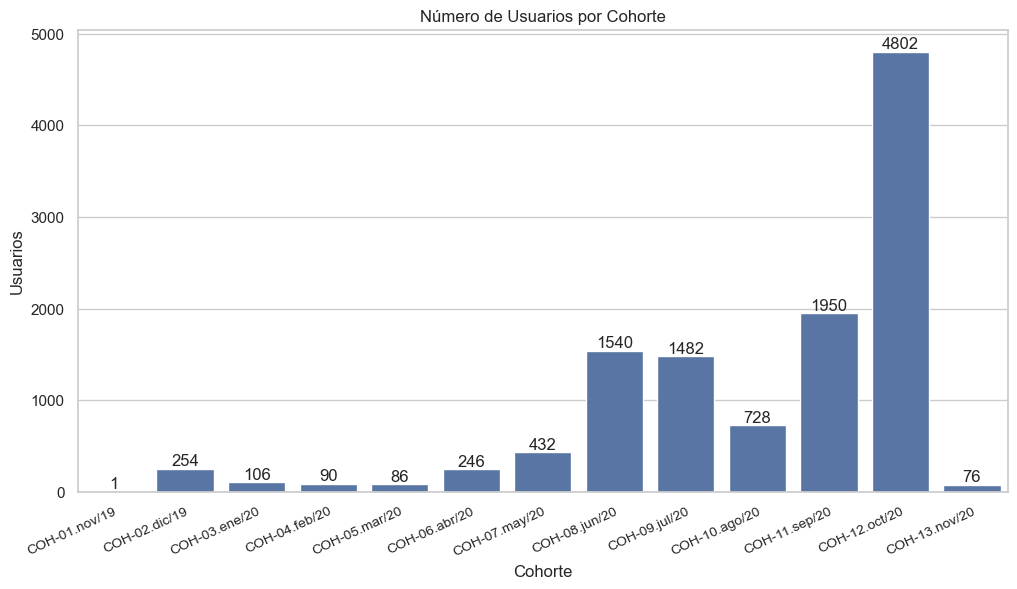

In [31]:
# Gràfico de barras para visualizar el número de usuarios por cohorte
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='cohorte_lbl', y='num_usuarios', data=users_by_cohort)
#ax.bar_label(ax.containers[0])
for c in ax.containers:
    ax.bar_label(c, labels=[f'{x:.0f}' for x in c.datavalues])    
plt.title('Número de Usuarios por Cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Usuarios')
plt.xticks(rotation=25, ha='right', rotation_mode='anchor', fontsize=10)
plt.show()

#### CONCLUSIONES:

- Se observa un despunte muy significativo en el número de ususarios nuevos en octubre de 2020.

- Dicha observación nos genera las siguientes preguntas:

    - ¿Se ha realizado alguna actualización en el sistema para facilitar el alta de usuarios nuevos?
    - ¿Se ha realizado alguna campaña de márketing para promocionar el servicio?